# Download and Save MIMIC CXR Files to Drive

In [0]:
# download 1 55gb training file
! wget --user b_fox@umail.ucsb.edu --ask-password https://physionet.org/works/MIMICCXR/files/version_1_0/train_p10.tar

Password for user ‘b_fox@umail.ucsb.edu’: 
--2019-05-15 04:28:12--  https://physionet.org/works/MIMICCXR/files/version_1_0/train_p10.tar
Resolving physionet.org (physionet.org)... 128.30.30.88
Connecting to physionet.org (physionet.org)|128.30.30.88|:443... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="PhysioNetWorks"
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 58501928960 (54G) [application/x-tar]
Saving to: ‘train_p10.tar’

train_p10.tar       100%[===================>]  54.48G  31.6MB/s    in 31m 48s 

2019-05-15 05:00:01 (29.2 MB/s) - ‘train_p10.tar’ saved [58501928960/58501928960]



In [0]:
# download validaiton/testing data ~4gb
! wget --user b_fox@umail.ucsb.edu --ask-password https://physionet.org/works/MIMICCXR/files/version_1_0/valid.tar

Password for user ‘b_fox@umail.ucsb.edu’: 
--2019-05-15 05:03:07--  https://physionet.org/works/MIMICCXR/files/version_1_0/valid.tar
Resolving physionet.org (physionet.org)... 128.30.30.88
Connecting to physionet.org (physionet.org)|128.30.30.88|:443... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="PhysioNetWorks"
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 4409210880 (4.1G) [application/x-tar]
Saving to: ‘valid.tar’

valid.tar           100%[===================>]   4.11G  31.7MB/s    in 2m 15s  

2019-05-15 05:05:22 (31.2 MB/s) - ‘valid.tar’ saved [4409210880/4409210880]



In [0]:
! ls

drive  sample_data  train_p10.tar  valid.tar


In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

     |████████████████████████████████| 993kB 9.8MB/s 


In [0]:
# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Create & upload a file to google drive
uploaded = drive.CreateFile({'title': 'train_p10.tar'})
uploaded.SetContentFile('train_p10.tar')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

In [0]:
# Create & upload a file to google drive
uploaded = drive.CreateFile({'title': 'valid.tar'})
uploaded.SetContentFile('valid.tar')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 17zoE2ZPBKPN6ON0WZaLyQGgV5iW4-6uO


# Download Tar File from Google Drive and Unarchive

In [0]:
from google.colab import drive, files
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
# copy and unarchive files to local from google drive
! tar -xf ./gdrive/My\ Drive/CV_Project/train_p10.tar
! tar -xf ./gdrive/My\ Drive/CV_Project/valid.tar

# Read Files, Reorganize directories, Remove Unnecessary Images, and Tar

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 9.3MB/s 


In [0]:
#! mkdir train_images
! mkdir valid_images

In [0]:
import os
import re
train_file_paths = []
for path, subdirs, files in os.walk('./train'):
    for name in files:
        train_file_paths.append(re.sub('\./', '', os.path.join(path, name)))

In [0]:
import os
import re
valid_file_paths = []
for path, subdirs, files in os.walk('./valid'):
    for name in files:
        valid_file_paths.append(re.sub('\./', '', os.path.join(path, name)))

In [0]:
len(train_file_paths), len(valid_file_paths)

(36167, 2732)

In [0]:
import pandas as pd
iter_csv = pd.read_csv('./gdrive/My Drive/CV_Project/train.csv', iterator = True, chunksize= 1000)
train_labels = pd.concat([chunk[(chunk['path'].isin(train_file_paths)) & (chunk['view'] == 'frontal')] for chunk in iter_csv]) # patients p10000000 - p11000000
valid_labels = pd.read_csv('./gdrive/My Drive/CV_Project/valid.csv')
valid_labels = valid_labels.loc[valid_labels['view'] == 'frontal']

In [0]:
train_labels.shape, valid_labels.shape

((24342, 16), (1759, 16))

In [0]:
train_labels.to_csv('./gdrive/My Drive/CV_Project/train_labels.csv', index=False)
valid_labels.to_csv('./gdrive/My Drive/CV_Project/valid_labels.csv', index=False)

In [0]:
train_file_paths = train_labels.path.tolist() # remove lateral and other images
len(train_file_paths)

24342

In [0]:
valid_file_paths = valid_labels.path.tolist() # remove lateral and other images
len(valid_file_paths)

1759

In [0]:
# move train images to new directory and name 1-24342
import shutil
for i, file in enumerate(train_file_paths):
  shutil.copy(os.path.join('./', file), './train_images/' + str(i) + '.jpg')

In [0]:
# move train images to new directory and name 1-1759
import shutil
for i, file in enumerate(valid_file_paths):
  shutil.copy(os.path.join('./', file), './valid_images/' + str(i) + '.jpg')

In [0]:
! tar -czf train_images.tar train_images # archive train images 

In [0]:
! tar -czf valid_images.tar valid_images # archive validation images

In [0]:
# Create & upload a file to google drive
uploaded = drive.CreateFile({'title': 'train_images.tar'})
uploaded.SetContentFile('train_images.tar')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1hvRtjtnGw4gCFGNBHhjO16Wnvi-kakN0


In [0]:
# Create & upload a file to google drive
uploaded = drive.CreateFile({'title': 'valid_images.tar'})
uploaded.SetContentFile('valid_images.tar')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1zWUr4fN9JCCM9euRFxy8HHQGqVOHELFN


# Image Preprocessing

In [0]:
from google.colab import drive, files
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
# copy and unarchive files to local from google drive, row indexes are file names in corresponding folders
! tar -xf ./gdrive/My\ Drive/CV_Project/train_images.tar
! tar -xf ./gdrive/My\ Drive/CV_Project/valid_images.tar

In [0]:
import numpy as np
import tensorflow as tf
import math
from keras.utils.np_utils import to_categorical
tf.set_random_seed(0)

from keras.layers import Reshape, RepeatVector, TimeDistributed, Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation, Flatten
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.layers.recurrent import LSTM

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


262144

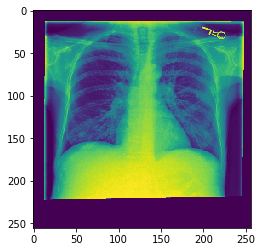

In [0]:
from skimage import transform, io
import matplotlib.pyplot as plt
%matplotlib inline
im = io.imread('./train_images/0.jpg', as_gray=True)
im = transform.resize(im,(256,256))
im = (im/255).astype(np.float32).reshape(256,256)  # change to float32 instead of float64 and normalize
plt.imshow(im)
im.nbytes

In [0]:
import os
train_file_paths = os.listdir('./train_images/')
valid_file_paths = os.listdir('./valid_images/')

In [0]:
train_file_paths.sort(key=lambda x: int(x.split('.')[0])) # sort 1-len(train_files)
valid_file_paths.sort(key=lambda x: int(x.split('.')[0])) # sort 1-len(valid_files)

In [0]:
train_file_paths[:5]

['0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg']

In [0]:
# read images from file, normalize, and place in numpy array
lung_images = []
for i,im_path in enumerate(train_file_paths): 
    im = io.imread(os.path.join('./train_images/', im_path), as_gray=True)
    im = transform.resize(im,(256,256))
    im = (im/255).astype(np.float16).reshape(256,256,1) # change to float16, normalize, and reshape
    lung_images.append(im)
    if i % 3000==0:
      print(i)
lung_images = np.array(lung_images)
np.save('./gdrive/My Drive/CV_Project/train_array.npy', lung_images)


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


0
3000
6000
9000
12000
15000
18000
21000
24000


In [0]:
# read images from file, normalize, and place in numpy array
test_images = []
for i,im_path in enumerate(valid_file_paths): 
    im = io.imread(os.path.join('./valid_images/', im_path), as_gray=True)
    im = transform.resize(im,(256,256))
    im = (im/255).astype(np.float16).reshape(256,256,1) # reshape to 256,256 and normalize by 255
    test_images.append(im)
test_images = np.array(test_images)
np.save('./gdrive/My Drive/CV_Project/test_array.npy', test_images)


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


## Image Preprocessing 224x224

In [0]:
import numpy as np
import pandas as pd

In [0]:
from google.colab import drive, files
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
train_data = np.load('./gdrive/My Drive/CV_Project/train_array.npy')
train_labels = pd.read_csv('./gdrive/My Drive/CV_Project/processed_train_labels.csv')
valid_data = np.load('./gdrive/My Drive/CV_Project/test_array.npy')
valid_labels = pd.read_csv('./gdrive/My Drive/CV_Project/processed_valid_labels.csv')

In [0]:
train_labels.fillna(0, inplace = True)
valid_labels.fillna(0, inplace = True)

In [0]:
train_labels.replace(-1,0,inplace = True)
valid_labels.replace(-1,0, inplace = True)

In [0]:
valid_labels.drop(columns = ['path','view'], inplace = True)
train_labels.drop(columns = ['path','view'], inplace = True)

In [0]:
train_labels.to_csv('./gdrive/My Drive/CV_Project/train_labels_fo_real.csv', index=False)
valid_labels.to_csv('./gdrive/My Drive/CV_Project/valid_labels_fo_real.csv', index=False)

In [0]:
from skimage import transform, io
lung_images = []
for i,im in enumerate(train_data): 
    im = transform.resize(im.astype(np.float32),(112,112))
    im = im.astype(np.float16).reshape(112,112,1) # change to float16, normalize, and reshape
    lung_images.append(im)
    if i % 3000==0:
      print(i)
lung_images = np.array(lung_images)
np.save('./gdrive/My Drive/CV_Project/train_array112.npy', lung_images)

0
3000
6000
9000
12000
15000
18000
21000
24000


In [0]:
from skimage import transform, io
lung_images = []
for i,im in enumerate(valid_data): 
    im = transform.resize(im.astype(np.float32),(112,112))
    im = im.astype(np.float16).reshape(112,112,1) # change to float16, normalize, and reshape
    lung_images.append(im)
    if i % 3000==0:
      print(i)
lung_images = np.array(lung_images)
np.save('./gdrive/My Drive/CV_Project/valid_array112.npy', lung_images)

0


# Image Training

In [1]:
from google.colab import drive, files
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import math
from keras.utils.np_utils import to_categorical
tf.set_random_seed(0)

from keras.layers import Dropout, Reshape, Convolution2D, ZeroPadding2D, RepeatVector, TimeDistributed, Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation, Flatten
from keras.models import Model, Sequential
from keras.optimizers import Adam, SGD
import keras.backend as K

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
#train_data = np.load('./gdrive/My Drive/CV_Project/train_array224.npy')
train_labels = pd.read_csv('./gdrive/My Drive/CV_Project/train_labels_fo_real.csv')
test_data = np.load('./gdrive/My Drive/CV_Project/valid_array224.npy')
test_labels = pd.read_csv('./gdrive/My Drive/CV_Project/valid_labels_fo_real.csv')

In [0]:
train_labels.drop(columns = ['Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Airspace Opacity', 'Lung Lesion', 'Consolidation', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion',
       'Pleural Other'], inplace = True)
test_labels.drop(columns = ['Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Airspace Opacity', 'Lung Lesion', 'Consolidation', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion',
       'Pleural Other'], inplace = True)

In [0]:
#train_data = train_data[(train_labels == 0).sum(axis = 1) != 5]
test_data = test_data[(test_labels == 0).sum(axis = 1) != 5]

train_labels = train_labels[(train_labels == 0).sum(axis = 1) != 5]
test_labels = test_labels[(test_labels == 0).sum(axis = 1) != 5]


In [9]:
train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

NameError: ignored

In [0]:
#plt.imshow(test_data[1].astype(np.float32).reshape(112,112))

In [0]:
#train_data = train_data.astype(np.float32)
test_data = test_data.astype(np.float32)

In [0]:
# # scale 
#train_data = (train_data - np.mean(train_data))/np.std(train_data)
test_data = (test_data - np.mean(test_data))/np.std(test_data)

In [0]:
train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

NameError: ignored

In [0]:
def calculating_class_weights(y_true):
    from sklearn.utils.class_weight import compute_class_weight
    number_dim = np.shape(y_true)[1]
    weights = np.empty([number_dim, 2])
    for i in range(number_dim):
        weights[i] = compute_class_weight('balanced', [0.,1.], y_true[:, i])
    return weights

In [0]:
def get_weighted_loss(weights):
    def weighted_loss(y_true, y_pred):
        return K.mean((weights[:,0]**(1-y_true))*(weights[:,1]**(y_true))*K.binary_crossentropy(y_true, y_pred), axis=-1)
    return weighted_loss

In [0]:
train_labels.sum()

No Finding         8057.0
Edema              2859.0
Pneumonia          1753.0
Fracture            538.0
Support Devices    7250.0
dtype: float64

In [13]:
[test_labels[i].value_counts() for i in train_labels.columns]

[1.0    652
 0.0    549
 Name: No Finding, dtype: int64, 0.0    1030
 1.0     171
 Name: Edema, dtype: int64, 0.0    1092
 1.0     109
 Name: Pneumonia, dtype: int64, 0.0    1173
 1.0      28
 Name: Fracture, dtype: int64, 0.0    750
 1.0    451
 Name: Support Devices, dtype: int64]

In [0]:
class_weights = calculating_class_weights(train_labels.values)

In [0]:
class_weights

array([[ 0.93769013,  1.07118034],
       [ 0.59925705,  3.01871284],
       [ 0.55651922,  4.92327439],
       [ 0.51608563, 16.04182156],
       [ 0.86210169,  1.19041379]])

## VGG16 Model

In [0]:
# vgg16 model
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  fro

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
opt = Adam(lr=0.000001, beta_1=0.9, beta_2= 0.999, epsilon=1e-08, decay=1e-5)
#sgd = SGD(lr=0.00001)
model.compile(optimizer=opt, loss=get_weighted_loss(class_weights), metrics=['categorical_accuracy','binary_accuracy'])

In [0]:
vgg_16_history = model.fit(train_data, train_labels, epochs=25, batch_size=64, 
          validation_split = 0.1, verbose=1, shuffle = True)

Instructions for updating:
Use tf.cast instead.
Train on 15534 samples, validate on 1727 samples
Epoch 1/25
15534/15534 [==============================] - 300s 19ms/step - loss: 0.6936 - categorical_accuracy: 0.2186 - binary_accuracy: 0.4573 - val_loss: 0.6879 - val_categorical_accuracy: 0.0625 - val_binary_accuracy: 0.5414
Epoch 2/25
15534/15534 [==============================] - 267s 17ms/step - loss: 0.6925 - categorical_accuracy: 0.2508 - binary_accuracy: 0.5209 - val_loss: 0.6834 - val_categorical_accuracy: 0.1893 - val_binary_accuracy: 0.4396
Epoch 3/25
15534/15534 [==============================] - 267s 17ms/step - loss: 0.6606 - categorical_accuracy: 0.3810 - binary_accuracy: 0.5936 - val_loss: 0.6371 - val_categorical_accuracy: 0.4331 - val_binary_accuracy: 0.6032
Epoch 4/25
15534/15534 [==============================] - 267s 17ms/step - loss: 0.6406 - categorical_accuracy: 0.4335 - binary_accuracy: 0.6198 - val_loss: 0.6361 - val_categorical_accuracy: 0.4754 - val_binary_accu

In [0]:
model.save('./gdrive/My Drive/CV_Project/vgg16_model.h5')

In [0]:
import pickle
with open('./gdrive/My Drive/CV_Project/history_vgg_16', 'wb') as file_pi:
  pickle.dump(vgg_16_history, file_pi)

In [0]:
predictions_vgg = model.predict(test_data)
predictions_vgg[predictions_vgg >= 0.5] = 1
predictions_vgg[predictions_vgg < 0.5] = 0

In [0]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, hamming_loss
vgg_acc = accuracy_score(test_labels,predictions_vgg)
vgg_f1 = f1_score(test_labels,predictions_vgg, average='micro')
vgg_recall = recall_score(test_labels,predictions_vgg, average='micro')
vgg_prec = precision_score(test_labels,predictions_vgg, average='micro')
vgg_hamming_loss = hamming_loss(test_labels,predictions_vgg)

In [0]:
vgg_acc, vgg_f1, vgg_recall, vgg_prec, vgg_hamming_loss

(0.582014987510408,
 0.7026819923371647,
 0.6498936924167257,
 0.7648040033361134,
 0.129225645295587)

Text(0, 0.5, 'Accuracy')

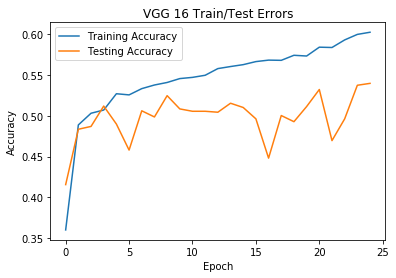

In [0]:
plt.plot(vgg_16_history.history['categorical_accuracy'], label = 'Training Accuracy')
plt.plot(vgg_16_history.history['val_categorical_accuracy'], label = 'Testing Accuracy')
plt.legend()
plt.title('VGG 16 Train/Test Errors')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

## CNN: INPUT -> [CONV -> RELU -> POOL]*2 -> FC -> RELU -> FC USE ME!

In [0]:
cnn_2_model = Sequential()

cnn_2_model.add(Conv2D(64, (3, 3), padding='same', input_shape=(224,224,1)))
cnn_2_model.add(Activation('relu'))
cnn_2_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_2_model.add(Dropout(rate=0.75))


cnn_2_model.add(Conv2D(64, (3, 3), padding='same'))
cnn_2_model.add(Activation('relu'))
cnn_2_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_2_model.add(Dropout(rate=0.75))

cnn_2_model.add(Flatten())
cnn_2_model.add(Dense(128, activation='relu'))
cnn_2_model.add(Dropout(rate = 0.5))
cnn_2_model.add(Dense(5))
cnn_2_model.add(Activation('sigmoid'))



# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes))
# model.add(Activation('softmax'))

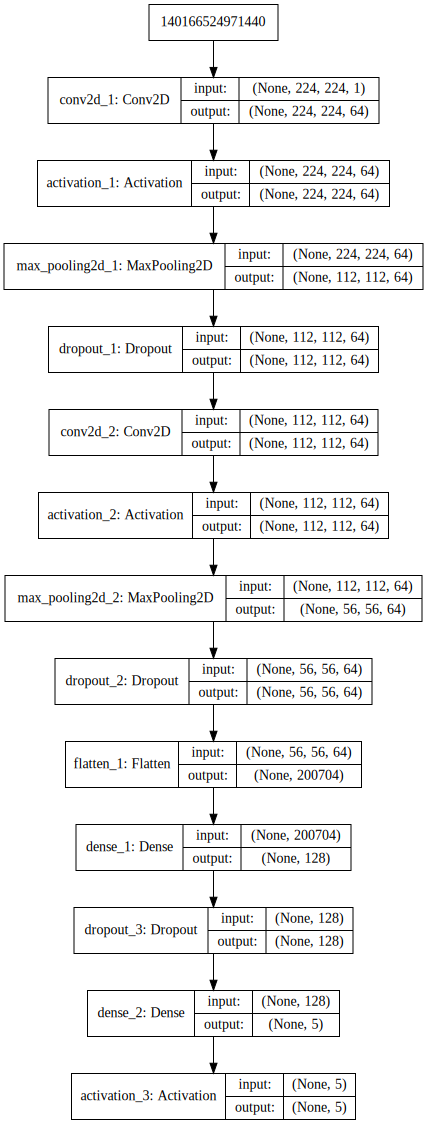

In [0]:
SVG(model_to_dot(cnn_2_model, show_shapes=True).create(prog='dot', format='svg'))

In [0]:
opt = Adam(lr=0.000001, beta_1=0.9, beta_2= 0.999, epsilon=1e-08, decay=1e-5)
cnn_2_model.compile(optimizer = opt, loss=get_weighted_loss(class_weights), metrics=['categorical_accuracy','binary_accuracy'])

#sgd = SGD(lr=0.00001)

In [0]:
history_cnn_2 = cnn_2_model.fit(train_data, train_labels, epochs=25, batch_size=64, 
          validation_split= 0.1, verbose=1, shuffle = True) # done with 224x224

Train on 15534 samples, validate on 1727 samples
Epoch 1/25
15534/15534 [==============================] - 50s 3ms/step - loss: 0.7454 - categorical_accuracy: 0.2193 - binary_accuracy: 0.5115 - val_loss: 0.6868 - val_categorical_accuracy: 0.1488 - val_binary_accuracy: 0.4836
Epoch 2/25
15534/15534 [==============================] - 46s 3ms/step - loss: 0.7050 - categorical_accuracy: 0.2320 - binary_accuracy: 0.5282 - val_loss: 0.6857 - val_categorical_accuracy: 0.2050 - val_binary_accuracy: 0.5014
Epoch 3/25
15534/15534 [==============================] - 46s 3ms/step - loss: 0.6935 - categorical_accuracy: 0.2441 - binary_accuracy: 0.5178 - val_loss: 0.6843 - val_categorical_accuracy: 0.3613 - val_binary_accuracy: 0.4928
Epoch 4/25
15534/15534 [==============================] - 46s 3ms/step - loss: 0.6890 - categorical_accuracy: 0.2667 - binary_accuracy: 0.5252 - val_loss: 0.6824 - val_categorical_accuracy: 0.3688 - val_binary_accuracy: 0.4991
Epoch 5/25
15534/15534 [===================

In [0]:
cnn_2_model.save('./gdrive/My Drive/CV_Project/cnn_2_model.h5')

In [0]:
import pickle
with open('./gdrive/My Drive/CV_Project/history_cnn_2', 'wb') as file_pi:
  pickle.dump(history_cnn_2, file_pi)

In [0]:
cnn_2_predictions = cnn_2_model.predict(test_data)
cnn_2_predictions[cnn_2_predictions >= 0.5] = 1
cnn_2_predictions[cnn_2_predictions < 0.5] = 0

In [0]:
cnn2_acc = accuracy_score(test_labels,cnn_2_predictions)
cnn2_f1 = f1_score(test_labels,cnn_2_predictions, average='micro')
cnn2_recall = recall_score(test_labels,cnn_2_predictions, average='micro')
cnn2_prec = precision_score(test_labels,cnn_2_predictions, average='micro')
cnn2_hamming_loss = hamming_loss(test_labels,cnn_2_predictions)

NameError: ignored

In [0]:
cnn2_acc, cnn2_f1, cnn2_recall, cnn2_prec, cnn2_hamming_loss

(0.4912572855953372,
 0.6090835360908353,
 0.5322466335931963,
 0.7118483412322275,
 0.16053288925895087)

In [0]:
plt.plot(history_cnn_2.history['acc'], label = 'Training Accuracy')
plt.plot(history_cnn_2.history['val_acc'], label = 'Testing Accuracy')
plt.legend()
plt.title('Vanilla CNN Train/Test Errors')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

KeyError: ignored

## Alex Net

In [0]:
alex_model = Sequential()

# 1st Convolutional Layer
alex_model.add(Conv2D(filters=96, input_shape=(224,224,1), kernel_size=(11,11), strides=(4,4), padding='valid'))
alex_model.add(Activation("relu"))
# Max Pooling
alex_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid"))

# 2nd Convolutional Layer
alex_model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding="valid"))
alex_model.add(Activation("relu"))
# Max Pooling
alex_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid"))

# 3rd Convolutional Layer
alex_model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="valid"))
alex_model.add(Activation("relu"))

# 4th Convolutional Layer
alex_model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="valid"))
alex_model.add(Activation("relu"))

# 5th Convolutional Layer
alex_model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="valid"))
alex_model.add(Activation("relu"))
# Max Pooling
alex_model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid"))

# Passing it to a Fully Connected layer
alex_model.add(Flatten())
# 1st Fully Connected Layer
alex_model.add(Dense(4096, input_shape=(224*224*1,)))
alex_model.add(Activation("relu"))
# Add Dropout to prevent overfitting
alex_model.add(Dropout(rate = 0.6))

# 2nd Fully Connected Layer
alex_model.add(Dense(4096))
alex_model.add(Activation("relu"))
# Add Dropout
alex_model.add(Dropout(rate = 0.6))

# 3rd Fully Connected Layer
alex_model.add(Dense(1000))
alex_model.add(Activation("relu"))
# Add Dropout
alex_model.add(Dropout(rate = 0.6))

# Output Layer
alex_model.add(Dense(5))
alex_model.add(Activation("sigmoid"))

#alex_model.summary()


#alex_model.summary()

# Compile the model
opt = Adam(lr=0.000001, beta_1=0.9, beta_2= 0.999, epsilon=1e-08, decay=1e-5)
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
alex_model.compile(optimizer = opt, loss=get_weighted_loss(class_weights), metrics=['categorical_accuracy','binary_accuracy'])


#sgd = SGD(lr=0.00001)

In [0]:
history_alex_model = alex_model.fit(train_data, train_labels, epochs=25, batch_size=64, 
          validation_split = 0.1, verbose=1, shuffle = True) # done with 224x224

Instructions for updating:
Use tf.cast instead.
Train on 15534 samples, validate on 1727 samples
Epoch 1/25
15534/15534 [==============================] - 26s 2ms/step - loss: 0.6938 - categorical_accuracy: 0.1761 - binary_accuracy: 0.4871 - val_loss: 0.6880 - val_categorical_accuracy: 0.1170 - val_binary_accuracy: 0.6131
Epoch 2/25
15534/15534 [==============================] - 16s 1ms/step - loss: 0.6935 - categorical_accuracy: 0.1972 - binary_accuracy: 0.4981 - val_loss: 0.6878 - val_categorical_accuracy: 0.1795 - val_binary_accuracy: 0.5969
Epoch 3/25
15534/15534 [==============================] - 16s 1ms/step - loss: 0.6932 - categorical_accuracy: 0.2210 - binary_accuracy: 0.5186 - val_loss: 0.6874 - val_categorical_accuracy: 0.2918 - val_binary_accuracy: 0.5903
Epoch 4/25
15534/15534 [==============================] - 16s 1ms/step - loss: 0.6928 - categorical_accuracy: 0.2430 - binary_accuracy: 0.5221 - val_loss: 0.6868 - val_categorical_accuracy: 0.3625 - val_binary_accuracy: 0.

In [0]:
alex_model.save('./gdrive/My Drive/CV_Project/alex_model.h5')

In [0]:
import pickle
with open('./gdrive/My Drive/CV_Project/alex_model', 'wb') as file_pi:
  pickle.dump(history_alex_model, file_pi)

In [0]:
alex_predictions = alex_model.predict(test_data)
alex_predictions[alex_predictions >= 0.5] = 1
alex_predictions[alex_predictions < 0.5] = 0

In [0]:
alex_acc = accuracy_score(test_labels,alex_predictions)
alex_f1 = f1_score(test_labels,alex_predictions, average='micro')
alex_recall = recall_score(test_labels,alex_predictions, average='micro')
alex_prec = precision_score(test_labels,alex_predictions, average='micro')
alex_hamming_loss = hamming_loss(test_labels,alex_predictions)

In [0]:
alex_acc, alex_f1, alex_recall, alex_prec, alex_hamming_loss

(0.5620316402997502,
 0.6769349249133615,
 0.622962437987243,
 0.7411467116357504,
 0.13971690258118236)

Text(0, 0.5, 'Accuracy')

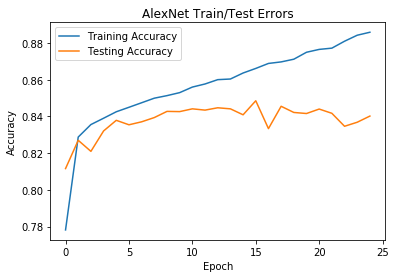

In [0]:
plt.plot(history_alex_model.history['acc'], label = 'Training Accuracy')
plt.plot(history_alex_model.history['val_acc'], label = 'Testing Accuracy')
plt.legend()
plt.title('AlexNet Train/Test Errors')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [0]:
cnn_3_model = Sequential()

cnn_3_model.add(Conv2D(64, (3, 3), padding='same', input_shape=train_data.shape[1:]))
cnn_3_model.add(Activation('relu'))
cnn_3_model.add(Conv2D(64, (3, 3), padding='same', input_shape=train_data.shape[1:]))
cnn_3_model.add(Activation('relu'))
cnn_3_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_3_model.add(Dropout(0.25))

cnn_3_model.add(Conv2D(32, (3, 3), padding='same', input_shape=train_data.shape[1:]))
cnn_3_model.add(Activation('relu'))
cnn_3_model.add(Conv2D(32, (3, 3), padding='same', input_shape=train_data.shape[1:]))
cnn_3_model.add(Activation('relu'))
cnn_3_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_3_model.add(Dropout(0.25))


cnn_3_model.add(Conv2D(16, (3, 3), padding='same', input_shape=train_data.shape[1:]))
cnn_3_model.add(Activation('relu'))
cnn_3_model.add(Conv2D(16, (3, 3), padding='same', input_shape=train_data.shape[1:]))
cnn_3_model.add(Activation('relu'))
cnn_3_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_3_model.add(Dropout(0.25))


cnn_3_model.add(Flatten())
cnn_3_model.add(Activation('relu'))
cnn_3_model.add(Dense(512))
cnn_3_model.add(Dropout(0.5))
cnn_3_model.add(Activation('relu'))

cnn_3_model.add(Dense(14))
cnn_3_model.add(Activation('sigmoid'))

# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes))
# model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
cnn_3_model.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['acc'])

In [0]:
history_cnn_3 = cnn_3_model.fit(train_data, train_labels, epochs=20, batch_size=64, 
          validation_data=(valid_data, valid_labels), verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 24342 samples, validate on 1759 samples
Epoch 1/20
24342/24342 [==============================] - 219s 9ms/step - loss: 0.3526 - acc: 0.8644 - val_loss: 0.3330 - val_acc: 0.8729
Epoch 2/20
24342/24342 [==============================] - 205s 8ms/step - loss: 0.3443 - acc: 0.8665 - val_loss: 0.3295 - val_acc: 0.8729
Epoch 3/20
24342/24342 [==============================] - 203s 8ms/step - loss: 0.3436 - acc: 0.8665 - val_loss: 0.3310 - val_acc: 0.8729
Epoch 4/20
24342/24342 [==============================] - 202s 8ms/step - loss: 0.3432 - acc: 0.8665 - val_loss: 0.3309 - val_acc: 0.8729
Epoch 5/20
24342/24342 [==============================] - 202s 8ms/step - loss: 0.3424 - acc: 0.8665 - val_loss: 0.3290 - val_acc: 0.8729
Epoch 6/20
24342/24342 [==============================] - 202s 8ms/step - loss: 0.3423 - acc: 0.8665 - val_loss: 0.3321 - val_acc: 0.8729
Epoch 7/20
24342/24342 [==============================] - 202s 8ms/step - l

In [0]:
cnn_3_model.save('./gdrive/My Drive/CV_Project/cnn_3_model.h5')

## REsnet

In [0]:
import os
import numpy as np
from keras import layers
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.models import Model
from keras.initializers import glorot_uniform
import pandas as pd


def identity_block(X, f, filters, stage, block):
    
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1,1), strides=(1,1), padding='valid', name=conv_name_base+'2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base+'2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f,f), strides=(1,1), padding='same', name=conv_name_base+'2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base+'2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1,1), strides=(1,1), padding='valid', name=conv_name_base+'2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base+'2c')(X)

    X = layers.Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

def convolutional_block(X, f, filters, stage, block, s=2):
    
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1,1), strides=(s,s), name=conv_name_base+'2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base+'2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f,f), strides=(1,1), padding='same', name=conv_name_base+'2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base+'2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1,1), strides=(1,1), name=conv_name_base+'2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base+'2c')(X)

    X_shortcut = Conv2D(F3, kernel_size=(1,1), strides=(s,s), name=conv_name_base+'1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base+'1')(X_shortcut)

    X = layers.Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X
  
opt = Adam(lr=0.000001, beta_1=0.9, beta_2= 0.999, epsilon=1e-08, decay=1e-5)
#opt = SGD(lr=0.00001)
objective = get_weighted_loss(class_weights)


#sgd = SGD(lr=0.00001)

def resNet():
    
    # Define the input as a tensor with shape input_shape
    X_input = Input((224,224,1))
    
    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)
    
    # Stage 1
    X = Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1',)(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)
    
    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')
    
    # Stage 3
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')
    
    # Stage 4
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')
    
    # Stage 5
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')
    
    # AVGPOOL
    # X = AveragePooling2D((2,2), name='avg_pool')(X)
    
    # output layer
    X = Flatten()(X)
    X = Dense(5, activation='sigmoid', name='fc' + str(train_labels.shape[1]))(X)
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')
    
    #Compile the model
    model.compile(optimizer=opt, loss=objective, metrics=['categorical_accuracy','binary_accuracy'])
    
    return model


# In[6]:


resnet_model = resNet()


# In[9]:

nb_epoch = 25
batch_size = 64

## Callback for loss logging per epoch
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))

#early_stopping = EarlyStopping(monitor='val_loss', patience=100, verbose=1, mode='auto')



resnet_history = resnet_model.fit(train_data, train_labels, batch_size=batch_size, epochs=nb_epoch,
                            validation_split=0.1, verbose=1, shuffle=True, class_weight = class_weights)


# In[ ]:


# fig1 = plt.figure(figsize = (12,10))
# ax1 = fig1.add_subplot(2,2,1)
# ax2 = fig1.add_subplot(2,2,2)

# ax1.plot(np.arange(1,nb_epoch+1), history.val_losses)
# ax1.set(xlabel='Epochs', ylabel='Validation Loss',
#        title='Epochs vs. Validation Loss')
# ax2.plot(np.arange(1,nb_epoch+1), history.losses)
# ax2.set(xlabel='Epochs', ylabel='Training Loss',
#        title='Epochs vs. Training Loss')
# plt.show()


# # In[ ]:


# fig1 = plt.figure(figsize = (12,10))
# ax1 = fig1.add_subplot(2,2,1)
# ax2 = fig1.add_subplot(2,2,2)

# ax1.plot(np.arange(1,nb_epoch+1), history.val_acc)
# ax1.set(xlabel='Epochs', ylabel='Validation Accuracy',
#        title='Epochs vs. Validation Accuracy')
# ax2.plot(np.arange(1,nb_epoch+1), history.acc)
# ax2.set(xlabel='Epochs', ylabel='Training Accuracy',
#        title='Epochs vs. Training Accuracy')
# plt.show()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 15534 samples, validate on 1727 samples
Epoch 1/25
15534/15534 [==============================] - 218s 14ms/step - loss: 0.9174 - categorical_accuracy: 0.2475 - binary_accuracy: 0.5250 - val_loss: 0.8777 - val_categorical_accuracy: 0.2583 - val_binary_accuracy: 0.5406
Epoch 2/25
15534/15534 [==============================] - 194s 13ms/step - loss: 0.8227 - categorical_accuracy: 0.3114 - binary_accuracy: 0.5685 - val_loss: 0.8654 - val_categorical_accuracy: 0.2739 - val_binary_accuracy: 0.5548
Epoch 3/25
15534/15534 [==============================] - 194s 12ms/step - loss: 0.7627 - categorical_accuracy: 0.3426 - binary_accuracy: 0.5970 - val_loss: 0.8457 - val_categorical_accuracy: 0.3098 - val_binary_accuracy: 0.5900
Epoch 4/25
15534/15534 [==============================] - 194s 13ms/step - loss: 0.7285 - categorical_accuracy: 0.3641 - binary_accuracy: 0.6156

In [0]:
resnet_model.save('./gdrive/My Drive/CV_Project/resnet_model.h5')

In [0]:
import pickle
with open('./gdrive/My Drive/CV_Project/resnet_model', 'wb') as file_pi:
  pickle.dump(resnet_history, file_pi)

In [0]:
resnet_predictions = resnet_model.predict(test_data)
resnet_predictions[resnet_predictions >= 0.5] = 1
resnet_predictions[resnet_predictions < 0.5] = 0

# Model Analysis

## Training and Validation Comparisons

In [0]:
import pickle
import keras.backend as K
from google.colab import drive, files
drive.mount('/content/gdrive/')

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
#import keras.losses
#keras.losses.custom_loss = weighted_loss

In [0]:
from keras.utils.generic_utils import get_custom_objects

loss = get_weighted_loss(class_weights)
get_custom_objects().update({"weighted_loss": loss})

In [0]:
resnet_hist = pickle.load(open('./gdrive/My Drive/CV_Project/resnet_model', "rb"))
alexnet_hist = pickle.load(open('./gdrive/My Drive/CV_Project/alex_model', "rb"))
#vgg_hist = pickle.load(open('./gdrive/My Drive/CV_Project/history_vgg_16', "rb"))
van_cnn_hist = pickle.load(open('./gdrive/My Drive/CV_Project/history_cnn_2', "rb"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
vgg_hist = pd.read_csv('./gdrive/My Drive/CV_Project/vgg_hist.csv', header = None)

In [0]:
vgg_hist.columns = ['loss', 'categorical_accuracy','val_loss', 'val_categorical_accuracy']

Text(0, 0.5, 'Accuracy')

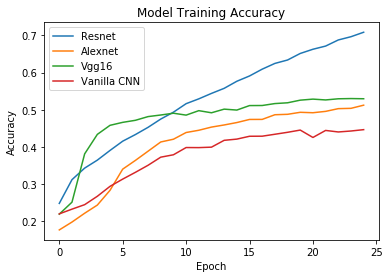

In [0]:
# training accuracy
plt.plot(resnet_hist.history['categorical_accuracy'], label = 'Resnet')
plt.plot(alexnet_hist.history['categorical_accuracy'], label = 'Alexnet')
plt.plot(vgg_hist['categorical_accuracy'], label = 'Vgg16')
plt.plot(van_cnn_hist.history['categorical_accuracy'], label = 'Vanilla CNN')
plt.legend()
plt.title('Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

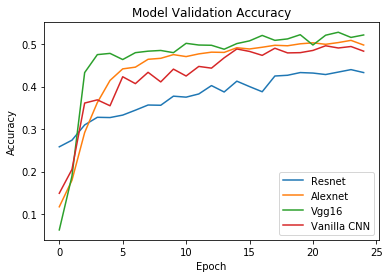

In [0]:
# validation errors
plt.plot(resnet_hist.history['val_categorical_accuracy'], label = 'Resnet')
plt.plot(alexnet_hist.history['val_categorical_accuracy'], label = 'Alexnet')
plt.plot(vgg_hist['val_categorical_accuracy'], label = 'Vgg16')
plt.plot(van_cnn_hist.history['val_categorical_accuracy'], label = 'Vanilla CNN')
plt.legend()
plt.title('Model Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

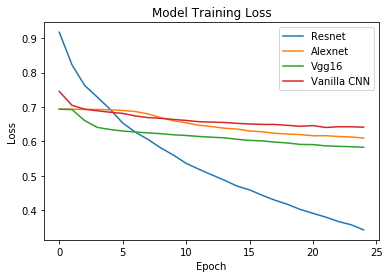

In [0]:
# validation errors
plt.plot(resnet_hist.history['loss'], label = 'Resnet')
plt.plot(alexnet_hist.history['loss'], label = 'Alexnet')
plt.plot(vgg_hist['loss'], label = 'Vgg16')
plt.plot(van_cnn_hist.history['loss'], label = 'Vanilla CNN')
plt.legend()
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

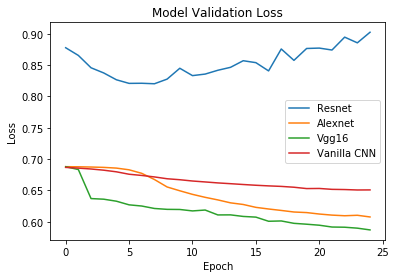

In [0]:
# validation errors
plt.plot(resnet_hist.history['val_loss'], label = 'Resnet')
plt.plot(alexnet_hist.history['val_loss'], label = 'Alexnet')
plt.plot(vgg_hist['val_loss'], label = 'Vgg16')
plt.plot(van_cnn_hist.history['val_loss'], label = 'Vanilla CNN')
plt.legend()
plt.title('Model Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

## Predictions and Testing

In [0]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, hamming_loss
from keras.models import load_model

In [0]:
resnet_model = load_model('./gdrive/My Drive/CV_Project/resnet_model.h5')
vgg_model = load_model('./gdrive/My Drive/CV_Project/vgg16_model.h5')
alexnet_model = load_model('./gdrive/My Drive/CV_Project/alex_model.h5')
van_cnn_model = load_model('./gdrive/My Drive/CV_Project/cnn_2_model.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
predictions_vgg = vgg_model.predict(test_data)
predictions_vgg[predictions_vgg >= 0.67] = 1
predictions_vgg[predictions_vgg < 0.67] = 0

predictions_resnet = resnet_model.predict(test_data)
predictions_resnet[predictions_resnet >= 0.67] = 1
predictions_resnet[predictions_resnet < 0.67] = 0

predictions_alex = alexnet_model.predict(test_data)
predictions_alex[predictions_alex >= 0.6] = 1
predictions_alex[predictions_alex < 0.6] = 0

predictions_van_cnn = van_cnn_model.predict(test_data)
predictions_van_cnn[predictions_van_cnn >= 0.54] = 1
predictions_van_cnn[predictions_van_cnn < 0.54] = 0

In [0]:
accuracy_score(test_labels,predictions_van_cnn)

0.2939217318900916

In [0]:
models = ['vgg', 'resnet','alexnet','van_cnn']
metrics = []
for y in [predictions_vgg, predictions_resnet,predictions_alex,predictions_van_cnn]:
  metrics.append([accuracy_score(test_labels,y), f1_score(test_labels,y,average='micro'), precision_score(test_labels,y,average='micro'), recall_score(test_labels,y,average='micro'), hamming_loss(test_labels,y)])

In [0]:
predictions_vgg = pd.DataFrame(predictions_vgg, columns = test_labels.columns)
predictions_resnet = pd.DataFrame(predictions_resnet, columns = test_labels.columns)
predictions_alex = pd.DataFrame(predictions_alex, columns = test_labels.columns)
predictions_van_cnn = pd.DataFrame(predictions_van_cnn, columns = test_labels.columns)

In [0]:
metrics2 = []

In [0]:
disease = 'Support Devices'
for i in [predictions_vgg, predictions_resnet,predictions_alex,predictions_van_cnn]:
  metrics2.append([accuracy_score(test_labels[disease], i[disease]), precision_score(test_labels[disease], i[disease]), recall_score(test_labels[disease], i[disease])])

In [0]:
pd.DataFrame(metrics2, columns = ['Accuracy','Precision','Recall']).to_csv('./gdrive/My Drive/CV_Project/test_metrics.csv', index = False)

In [0]:
Atest_metrics = pd.DataFrame(metrics).T
test_metrics.columns = models

In [0]:
test_metrics.to_csv('./gdrive/My Drive/CV_Project/test_metrics.csv', index=False)

## HeatMaps

In [0]:
! pip install git+git://github.com/raghakot/keras-vis.git --upgrade --no-deps

  Cloning git://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-o2svmctv
  Running command git clone -q git://github.com/raghakot/keras-vis.git /tmp/pip-req-build-o2svmctv
  Stored in directory: /tmp/pip-ephem-wheel-cache-2tvy9nk5/wheels/ff/01/8e/3a66d951f9b53f9894a010107b05253fb9a6c6f2555a5aaeca
Successfully built keras-vis
  Found existing installation: keras-vis 0.4.1
    Uninstalling keras-vis-0.4.1:
      Successfully uninstalled keras-vis-0.4.1


In [0]:
import keras.backend as K
# following http://www.hackevolve.com/where-cnn-is-looking-grad-cam/

In [0]:
test_labels.reset_index(drop=True,inplace=True)

In [0]:
ind = 0

In [0]:
x_test = test_data[test_labels['No Finding'] == 1][ind]

In [0]:
y_test = test_labels[test_labels['No Finding'] == 1].iloc[ind,:].values.astype(np.int)

In [0]:
test_labels.columns

Index(['No Finding', 'Edema', 'Pneumonia', 'Fracture', 'Support Devices'], dtype='object')

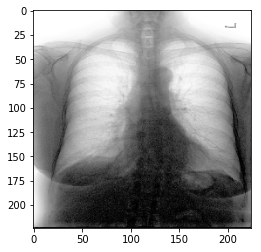

In [0]:
plt.imshow(x_test.reshape(224,224), cmap = 'gray_r')

In [0]:
from vis.visualization import visualize_cam, visualize_cam_with_losses, overlay, get_num_filters
import matplotlib.pyplot as plt
import numpy as np

# for i in range(10):
#     ind = np.where(y_test == i)[0][0]
#     plt.subplot(141)
#     plt.imshow(x_test_resized[ind].reshape((28,28)))
#     for j,modifier in enumerate([None, 'guided', 'relu']):
#         heat_map = visualize_cam(model, 4, y_test[ind], x_test_resized[ind], backprop_modifier=modifier)
#         plt.subplot(1,4,j+2)
#         plt.imshow(heat_map)

#     plt.show()

In [0]:
heatmmape = visualize_cam(model=vgg_model, layer_idx=36, filter_indices=0, seed_input=x_test, backprop_modifier='relu', penultimate_layer_idx=28)

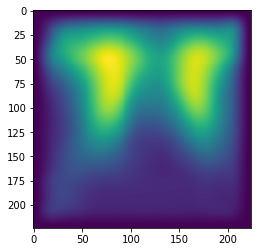

In [0]:
plt.imshow(heatmmape)

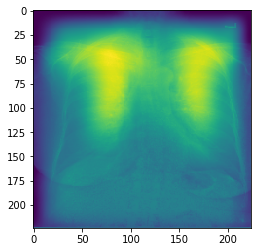

In [0]:
plt.imshow(overlay(x_test.reshape(224,224),heatmmape, alpha=0.1))

In [0]:
from keras.models import load_model
model = load_model('./gdrive/My Drive/CV_Project/vgg16_model.h5')

In [0]:
# choose an image x, with a support device for vis purposes
x = train_data[train_labels['Support Devices'] == 1][15].reshape(1,112,112,1)
preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("conv2d_104") # get last layer of convolution 

In [0]:
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

In [0]:
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

In [0]:
np.zeros((112,112))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
img = np.stack([img.reshape(112,112),np.zeros((112,112)),np.zeros((112,112))],axis=2).shape

(112, 112, 3)

In [0]:
img = np.stack([x.reshape(112,112),x.reshape(112,112),x.reshape(112,112)], axis =2)

In [0]:
import cv2
img2 = x.reshape(112,112,1)
heatmap = cv2.resize(heatmap, (112, 112))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img2[:,:,0], 0.6, heatmap[:,:,0], 0.4, 0)
plt.imshow(img)
plt.imshow(heatmap)
#cv2.waitKey(0)

error: ignored

In [0]:
img2.shape

(112, 112, 1)

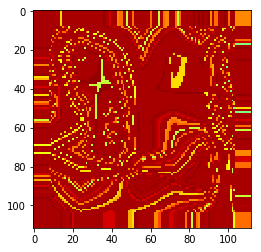

In [0]:
plt.imshow(heatmap)

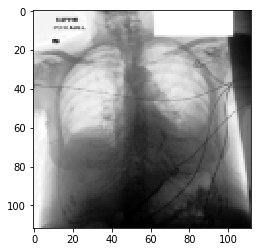

In [0]:
plt.imshow(img, cmap = 'gray_r')

In [0]:
from PIL import Image

In [0]:
im = Image.fromarray(np.uint8(img*255))

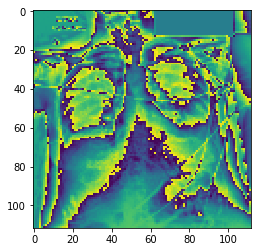

In [0]:
plt.imshow(im)

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_92 (ZeroPaddi (None, 114, 114, 1)       0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 112, 112, 64)      640       
_________________________________________________________________
zero_padding2d_93 (ZeroPaddi (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
zero_padding2d_94 (ZeroPaddi (None, 58, 58, 64)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 56, 56, 128)       73856     
__________

In [0]:
?missinglink_callback.generate_grad_cam(path, model)

Object `missinglink_callback.generate_grad_cam` not found.
